In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
a = pd.read_csv(r'C:\Users\SNEHA\Downloads\Real estate.csv')
a.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
0,1,2013,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2013,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2014,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2014,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2013,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
a=a.drop(['No','transaction_date'],axis=1)
a

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


# Data type

In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house_age                            414 non-null    float64
 1   distance_to_the_nearest_MRT_station  414 non-null    float64
 2   number_of_convenience_stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house_price                          414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


# Univariate analysis

In [7]:
a.describe()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Identify outliers

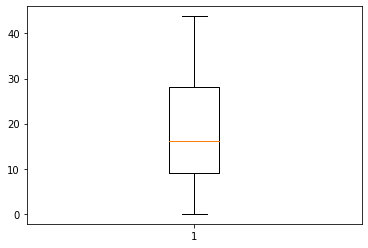

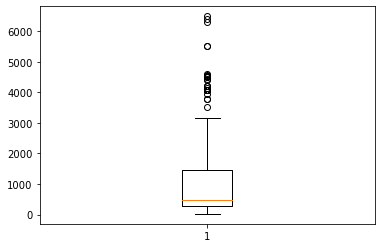

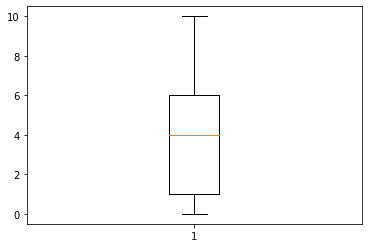

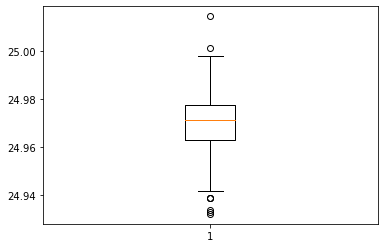

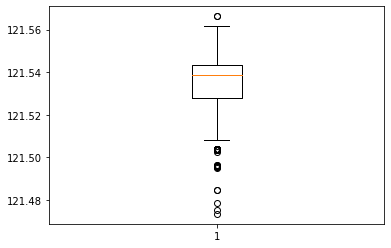

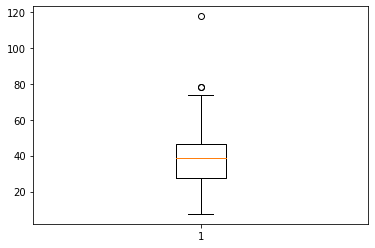

In [8]:
import matplotlib.pyplot as plt
i =['house_age','distance_to_the_nearest_MRT_station','number_of_convenience_stores','latitude','longitude','house_price']
for j in i:
    plt.figure()
    plt.boxplot(a[j])

In [9]:
a.shape

(414, 6)

In [10]:
def outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit =q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_limit,lower_limit,
                       np.where(df[col] > upper_limit,upper_limit,df[col]))
    return df[col]

0      32.0
1      19.5
2      13.3
3      13.3
4       5.0
       ... 
409    13.7
410     5.6
411    18.8
412     8.1
413     6.5
Name: house_age, Length: 414, dtype: float64
0        84.87882
1       306.59470
2       561.98450
3       561.98450
4       390.56840
          ...    
409    3201.71030
410      90.45606
411     390.96960
412     104.81010
413      90.45606
Name: distance_to_the_nearest_MRT_station, Length: 414, dtype: float64
0      10.0
1       9.0
2       5.0
3       5.0
4       5.0
       ... 
409     0.0
410     9.0
411     7.0
412     5.0
413     9.0
Name: number_of_convenience_stores, Length: 414, dtype: float64
0      24.98298
1      24.98034
2      24.98746
3      24.98746
4      24.97937
         ...   
409    24.94155
410    24.97433
411    24.97923
412    24.96674
413    24.97433
Name: latitude, Length: 414, dtype: float64
0      121.540240
1      121.539510
2      121.543910
3      121.543910
4      121.542450
          ...    
409    121.505255
410    121.5

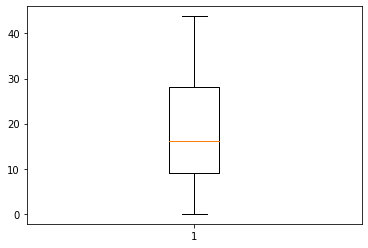

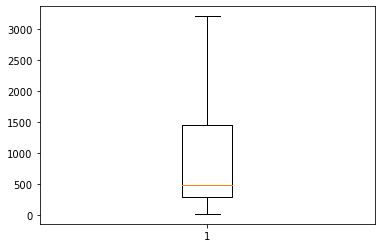

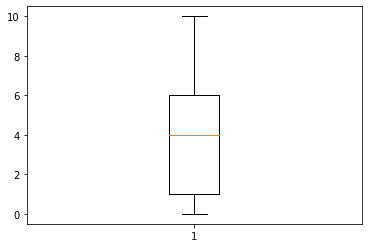

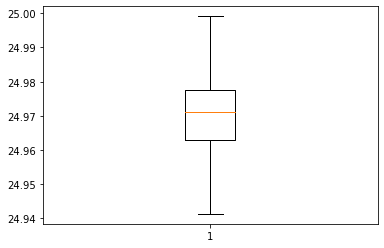

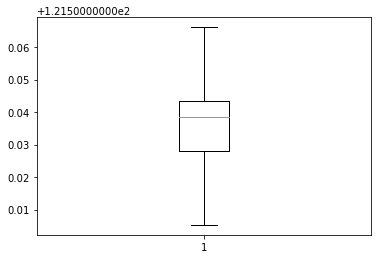

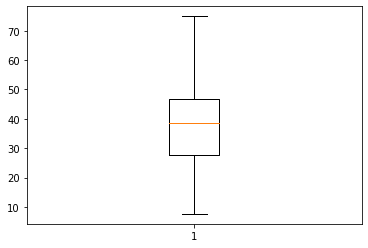

In [11]:
for j in i:
    print(outliers(a,j))

for j in i:
    plt.figure()
    plt.boxplot(a[j])

## Identify missing values

In [12]:
a.isna().sum()

house_age                              0
distance_to_the_nearest_MRT_station    0
number_of_convenience_stores           0
latitude                               0
longitude                              0
house_price                            0
dtype: int64

## Data Partition

In [13]:
x = a.drop('house_price',axis=1)
x.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude
0,32.0,84.87882,10.0,24.98298,121.54024
1,19.5,306.59470,9.0,24.98034,121.53951
2,13.3,561.98450,5.0,24.98746,121.54391
3,13.3,561.98450,5.0,24.98746,121.54391
4,5.0,390.56840,5.0,24.97937,121.54245


In [14]:
y =a[['house_price']]
y.head()

,house_price
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [15]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train ,Y_test =train_test_split(x,y,train_size=0.7,random_state=80)

In [16]:
df = pd.concat([X_train,Y_train],axis=1)
df

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
58,30.3,3201.71030,1.0,24.94925,121.505255,22.60
270,10.8,252.58220,1.0,24.97460,121.530460,74.95
398,14.7,1717.19300,2.0,24.96447,121.516490,23.00
19,1.5,23.38284,7.0,24.96772,121.541020,47.70
110,8.1,104.81010,5.0,24.96674,121.540670,51.60
...,...,...,...,...,...,...
306,14.4,169.98030,1.0,24.97369,121.529790,50.20
10,34.8,405.21340,1.0,24.97349,121.533720,41.40
211,0.0,274.01440,1.0,24.97480,121.530590,43.50
188,34.8,190.03920,8.0,24.97707,121.543120,44.30


## Correlation matrix

In [17]:
df.corr()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
house_age,1.000000,-0.003020,0.039009,0.048570,-0.021208,-0.242076
distance_to_the_nearest_MRT_station,-0.003020,1.000000,-0.624445,-0.543144,-0.726350,-0.699675
number_of_convenience_stores,0.039009,-0.624445,1.000000,0.433604,0.414703,0.577362
latitude,0.048570,-0.543144,0.433604,1.000000,0.332656,0.543846
longitude,-0.021208,-0.726350,0.414703,0.332656,1.000000,0.493262
house_price,-0.242076,-0.699675,0.577362,0.543846,0.493262,1.000000


<AxesSubplot:>

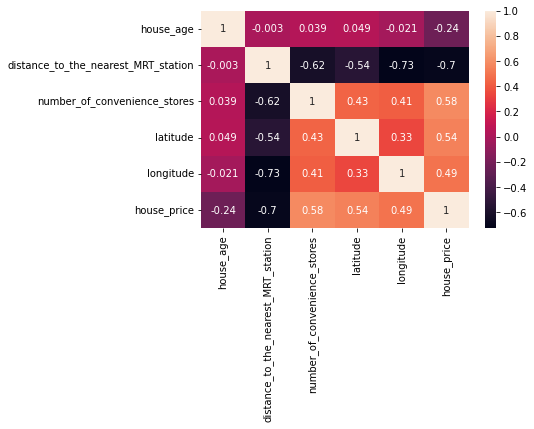

In [18]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='longitude', ylabel='house_price'>

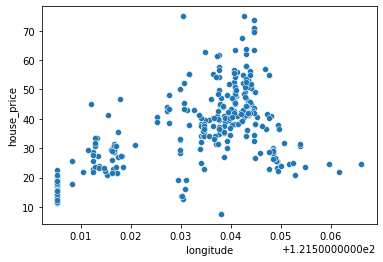

In [19]:
sns.scatterplot(x='longitude',y='house_price',data=df)

* Longitude has 79% strong positive correlation with house price
* There is no collinearity in data

# Multicollinearity

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x1 =df.drop('house_price',axis=1)

series_before=pd.Series([variance_inflation_factor(x1.values,i)
                        for i in range(x1.shape[1])],
                       index=x1.columns)
series_before

house_age                              3.351380e+00
distance_to_the_nearest_MRT_station    3.611708e+00
number_of_convenience_stores           4.777807e+00
latitude                               5.729174e+06
longitude                              5.729109e+06
dtype: float64

C:\Users\SNEHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transformed_house_price', ylabel='Density'>

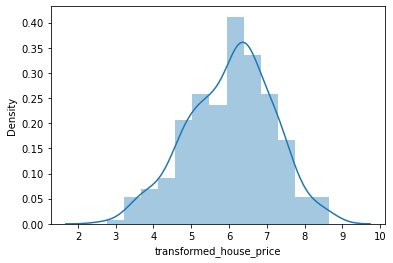

In [39]:
df['transformed_house_price']=df['house_price'].transform([np.sqrt])
df
sns.distplot(df['transformed_house_price'])

# Model building

#### H0: There is no relationship between  house price and other attributes

#### H1: There is relationship between house price and other attributes

In [40]:
import statsmodels.formula.api as smf
model = smf.ols('transformed_house_price ~ house_age + distance_to_the_nearest_MRT_station + number_of_convenience_stores + latitude +longitude',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     transformed_house_price   R-squared:                       0.658
Model:                                 OLS   Adj. R-squared:                  0.652
Method:                      Least Squares   F-statistic:                     108.9
Date:                     Wed, 18 May 2022   Prob (F-statistic):           7.79e-64
Time:                             00:06:51   Log-Likelihood:                -286.45
No. Observations:                      289   AIC:                             584.9
Df Residuals:                          283   BIC:                             606.9
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            -801.9252    530.163     -1.513      0.131   -1845.488     241.637
house_age                              -0.0238      0.003     -7.231      0.000      -0.030      -0.017
distance_to_the_nearest_MRT_station    -0.0005   7.46e-05     -7.079      0.000      -0.001      -0.000
number_of_convenience_stores            0.0736      0.017      4.309      0.000       0.040       0.107
latitude                               23.7944      3.865      6.157      0.000      16.187      31.401
longitude                               1.7647      4.213      0.419      0.676      -6.528      10.057
==============================================================================
Omnibus:                       42.518   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.511
Skew:                           0.252   Prob(JB):                     5.56e-66
Kurtosis:                       7.970   Cond. No.                     1.87e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multicollinearity

In [42]:
x1.shape

(289, 6)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x1 =df.drop('house_price',axis=1)

series_before=pd.Series([variance_inflation_factor(x1.values,i)
                        for i in range(x1.shape[1])],
                       index=x1.columns)
series_before

house_age                              3.970076e+00
distance_to_the_nearest_MRT_station    5.199796e+00
number_of_convenience_stores           5.082390e+00
latitude                               6.445257e+06
longitude                              6.427800e+06
transformed_house_price                8.787738e+01
dtype: float64

# Assumptions of model

## 1.Linearity

In [ ]:
sns.scatterplot(x='',y='',data=df)

## 2. Constant variance

In [ ]:
df['fitted_values']=model.fittedvalues
df['residual']=model.resid
df

In [ ]:
sns.scatterplot(x='fitted_values',y='residual',data=df)

## 3.Normality

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'],fit=True,line='s')
fig.show()

## 4. Model in error is idependently identically distributed

In [ ]:
sns.distplot(df.residual)

## Prediction on test data

In [ ]:
test = pd.concat([X_test,Y_test],axis=1)
test

In [ ]:
test['predicted']=model.predict(test)
test